In [1]:
!pip install pycaret[full]

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/DM_Assignment3/placedata v2.0 synthetic.csv')
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
from pycaret.classification import *

In [6]:
clf1 = setup(data,
             target = 'PlacementStatus',
             train_size = 0.8,
             categorical_features = ['ExtracurricularActivities', 'PlacementTraining'],
             ignore_features = ['StudentID'],
             normalize = True,
             session_id = 42)

,Description,Value
0,Session id,42
1,Target,PlacementStatus
2,Target type,Binary
3,Target mapping,"NotPlaced: 0, Placed: 1"
4,Original data shape,"(10000, 12)"
5,Transformed data shape,"(10000, 11)"
6,Transformed train set shape,"(8000, 11)"
7,Transformed test set shape,"(2000, 11)"
8,Ignore features,1
9,Ordinal features,2


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7999,0.8788,0.7457,0.7704,0.7577,0.5873,0.5877,0.3040
gbc,Gradient Boosting Classifier,0.7969,0.8760,0.7382,0.7687,0.7530,0.5807,0.5812,0.8520
lr,Logistic Regression,0.7968,0.8767,0.7597,0.7573,0.7582,0.5829,0.5832,1.1340
ridge,Ridge Classifier,0.7961,0.0000,0.7799,0.7463,0.7625,0.5841,0.5848,0.1540
lda,Linear Discriminant Analysis,0.7960,0.8758,0.7799,0.7461,0.7624,0.5839,0.5846,0.1690
nb,Naive Bayes,0.7942,0.8742,0.7933,0.7369,0.7639,0.5820,0.5835,0.1760
svm,SVM - Linear Kernel,0.7929,0.0000,0.7377,0.7632,0.7489,0.5729,0.5744,0.1880
catboost,CatBoost Classifier,0.7919,0.8714,0.7278,0.7652,0.7459,0.5698,0.5706,3.7620
lightgbm,Light Gradient Boosting Machine,0.7899,0.8705,0.7329,0.7586,0.7453,0.5666,0.5671,1.3710
qda,Quadratic Discriminant Analysis,0.7880,0.8648,0.7466,0.7482,0.7472,0.5647,0.5649,0.0990


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=42)

In [8]:
rf = create_model('rf')
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7875,0.8649,0.7134,0.7636,0.7377,0.5594,0.5603
1,0.8038,0.8656,0.7194,0.7928,0.7543,0.5916,0.5935
2,0.8000,0.8736,0.7351,0.7767,0.7554,0.5864,0.5871
3,0.7762,0.8493,0.6637,0.7716,0.7136,0.5317,0.5358
4,0.7812,0.8637,0.7173,0.7508,0.7336,0.5482,0.5486
5,0.7712,0.8547,0.6994,0.7413,0.7198,0.5268,0.5274
6,0.7788,0.8559,0.7113,0.7492,0.7298,0.5427,0.5432
7,0.7812,0.8692,0.7321,0.7432,0.7376,0.5501,0.5501
8,0.7825,0.8633,0.7351,0.7440,0.7395,0.5528,0.5529


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8038,0.8730,0.7463,0.7764,0.7610,0.5947,0.5950
1,0.8075,0.8780,0.7194,0.8007,0.7579,0.5989,0.6012
2,0.7962,0.8835,0.7232,0.7764,0.7488,0.5778,0.5788
3,0.7850,0.8539,0.6905,0.7733,0.7296,0.5521,0.5545
4,0.7988,0.8762,0.7351,0.7743,0.7542,0.5840,0.5846
5,0.7800,0.8636,0.7292,0.7424,0.7357,0.5473,0.5474
6,0.7850,0.8700,0.7292,0.7515,0.7402,0.5569,0.5571
7,0.8075,0.8841,0.7649,0.7741,0.7695,0.6042,0.6043
8,0.8062,0.8825,0.7708,0.7685,0.7697,0.6025,0.6025


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [9]:
gboost = create_model('gbc')
tuned_gboost = tune_model(gboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8038,0.8752,0.7522,0.7730,0.7625,0.5953,0.5955
1,0.8025,0.8786,0.7254,0.7864,0.7547,0.5898,0.5912
2,0.7962,0.8849,0.7351,0.7695,0.7519,0.5792,0.5796
3,0.7812,0.8517,0.6935,0.7639,0.7270,0.5452,0.5470
4,0.7925,0.8770,0.7351,0.7623,0.7485,0.5720,0.5723
5,0.7762,0.8666,0.7173,0.7415,0.7292,0.5387,0.5389
6,0.7988,0.8751,0.7470,0.7676,0.7572,0.5854,0.5856
7,0.8125,0.8806,0.7738,0.7784,0.7761,0.6148,0.6148
8,0.8025,0.8829,0.7649,0.7649,0.7649,0.5946,0.5946


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8793,0.7463,0.7692,0.7576,0.5874,0.5876
1,0.8088,0.8815,0.7284,0.7974,0.7613,0.6023,0.6040
2,0.7975,0.8869,0.7411,0.7685,0.7545,0.5823,0.5826
3,0.7887,0.8570,0.7083,0.7702,0.7380,0.5615,0.5629
4,0.8012,0.8818,0.7560,0.7674,0.7616,0.5912,0.5913
5,0.7825,0.8657,0.7292,0.7470,0.7380,0.5521,0.5522
6,0.8025,0.8725,0.7619,0.7665,0.7642,0.5943,0.5943
7,0.8075,0.8860,0.7679,0.7725,0.7701,0.6046,0.6046
8,0.8075,0.8837,0.7768,0.7676,0.7722,0.6055,0.6056


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [10]:
logreg = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7962,0.8764,0.7791,0.7457,0.7620,0.5841,0.5845
1,0.8025,0.8771,0.7343,0.7810,0.7569,0.5909,0.5917
2,0.7837,0.8821,0.7500,0.7390,0.7445,0.5570,0.5571
3,0.7950,0.8535,0.7292,0.7704,0.7492,0.5761,0.5767
4,0.7950,0.8779,0.7619,0.7529,0.7574,0.5799,0.5799
5,0.7788,0.8683,0.7351,0.7373,0.7362,0.5457,0.5457
6,0.7988,0.8708,0.7679,0.7566,0.7622,0.5878,0.5878
7,0.8112,0.8878,0.7917,0.7666,0.7789,0.6143,0.6146
8,0.8000,0.8838,0.7798,0.7529,0.7661,0.5915,0.5918


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
stacker = stack_models(estimator_list = [tuned_rf, tuned_gboost, logreg])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8012,0.8788,0.7672,0.7604,0.7637,0.5922,0.5922
1,0.8062,0.8796,0.7284,0.7922,0.7589,0.5975,0.5989
2,0.7900,0.8853,0.7440,0.7530,0.7485,0.5683,0.5683
3,0.7912,0.8557,0.7202,0.7683,0.7435,0.5678,0.5686
4,0.7938,0.8800,0.7530,0.7552,0.7541,0.5765,0.5765
5,0.7738,0.8686,0.7351,0.7286,0.7319,0.5362,0.5362
6,0.7962,0.8724,0.7589,0.7567,0.7578,0.5820,0.5820
7,0.8075,0.8889,0.7798,0.7661,0.7729,0.6059,0.6059
8,0.8012,0.8852,0.7857,0.7521,0.7686,0.5946,0.5950


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
final_model = finalize_model(stacker)

In [13]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

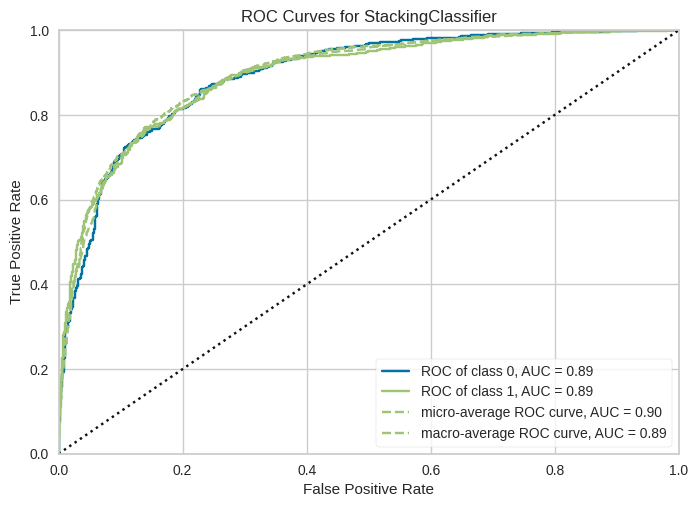

In [14]:
plot_model(final_model)

In [15]:
data_copy = data.copy()
data_copy.drop('PlacementStatus', axis=1, inplace=True)
data_copy.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,1,7.5,1,1,1,65,4.4,No,No,61,79
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88


In [16]:
prediction = predict_model(final_model, data = data_copy)
prediction.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,prediction_label,prediction_score
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced,0.9610
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed,0.8759
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced,0.5805
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed,0.6755
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed,0.8065
